# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [12]:
data = pd.read_csv('weight-height.csv')

data
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

male_height_mean = male_df['Height'].mean()
male_height_std = male_df['Height'].std()
male_weight_mean = male_df['Weight'].mean()
male_weight_std = male_df['Weight'].std()

female_height_mean = female_df['Height'].mean()
female_height_std = female_df['Height'].std()
female_weight_mean = female_df['Weight'].mean()
female_weight_std = female_df['Weight'].std()

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

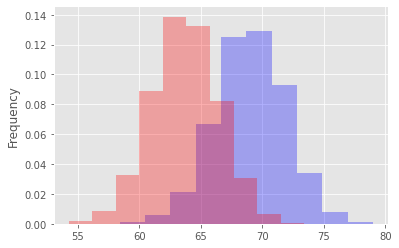

In [41]:
fig, ax = plt.subplots()

male_df['Height'].plot.hist(
    bins=10, density = True,
    ax = ax,
    color = 'blue', alpha = .3)

female_df['Height'].plot.hist(
    bins=10, density = True,
    ax = ax,
    color = 'red', alpha = .3);

In [21]:
# Record your observations - are these inline with your personal observations?
# Men are typically taller than women, both genders tend to have a normal distribution.
# This lines up with my general observations

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

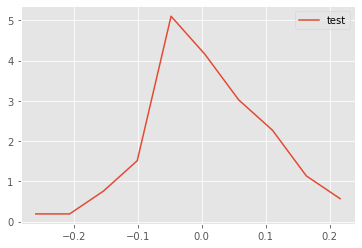

In [32]:
def density(x):
    
    n, bins = np.histogram(x, bins=10, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = .5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
        
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

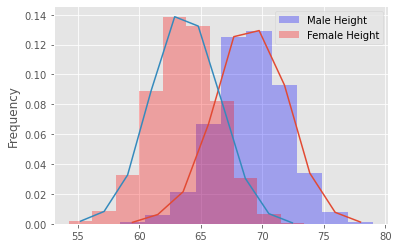

In [43]:
fig, ax = plt.subplots()

male_df['Height'].plot.hist(
    bins=10, density = True,
    ax = ax,
    color = 'blue', alpha = .3,
    label = 'Male Height')


female_df['Height'].plot.hist(
    bins=10, density = True,
    ax = ax,
    color = 'red', alpha = .3,
    label = 'Female Height')

plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)

x,y = density(female_df.Height)
plt.plot(x,y)

# male_df.Height.plot.hist(bins = 10, density = True,  alpha = 0.7, label ="Male Height");
# female_df.Height.plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Female Height');

# plt.legend()
# x,y = density(male_df.Height)
# plt.plot(x,y)
# x,y = density(female_df.Height)
# plt.plot(x,y)
# plt.show()

## Repeat the above exercise for male and female weights

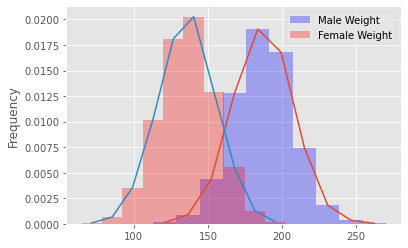

In [45]:
fig, ax = plt.subplots()

male_df['Weight'].plot.hist(
    bins=10, density = True,
    ax = ax,
    color = 'blue', alpha = .3,
    label = 'Male Weight')


female_df['Weight'].plot.hist(
    bins=10, density = True,
    ax = ax,
    color = 'red', alpha = .3,
    label = 'Female Weight')

plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)

x,y = density(female_df.Weight)
plt.plot(x,y)

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
# Both graphs appear similar

# What is the takeaway when comparing male and female heights and weights?
# Height is related to weight

## Repeat the above experiments in seaborn and compare with your results

/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


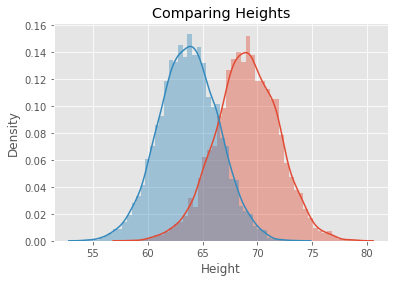

In [46]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


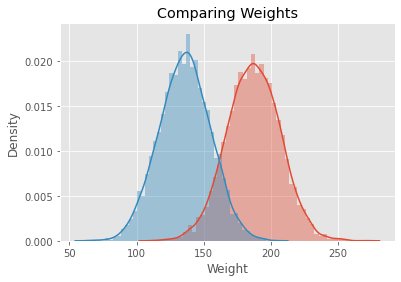

In [47]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.